## Import libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import gym
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from collections import deque

Using TensorFlow backend.


## Set variables

In [2]:
learning_rate = 0.001
state_size = 4
action_size = 2

memory_size = 10000
batch_size = 32

gamma = 0.99
alpha = 0.1

## Import environment

In [3]:
env = gym.make('CartPole-v0')

[2018-03-29 21:49:26,541] Making new env: CartPole-v0


## Create model

In [26]:
q_network = Sequential()

q_network.add(Dense(16, activation='relu', input_dim=state_size))
q_network.add(Dense(16, activation='relu'))
q_network.add(Dense(action_size, activation='linear'))

optimizer = Adam(lr=learning_rate)
q_network.compile(loss='mse', optimizer=optimizer)

## Main function

In [27]:
rewards_list = []
epsilon = 1.0
epsilon_decay = 0.993

memory = deque(maxlen=memory_size)

for episode in range(250):
    
    state = env.reset()
    state = np.reshape(state, [1, 4])
    total_reward = 0
    done = False
    
    if (epsilon > 0.01):
        epsilon *= epsilon_decay
    
    while not done:
        
        # Choose action
        if epsilon > np.random.rand():
            action = env.action_space.sample()
        else:
            action = np.argmax(q_network.predict(state)[0])
        
        # Apply action to environment, get next state/reward, and save to memory object
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, 4])
        total_reward += reward
        
        if done:
            next_state = np.zeros(state.shape) # end of episode
            
        memory.append((state, action, reward, next_state))
        state = next_state

        # Train model
        if (len(memory) >= batch_size):
            
            minibatch = random.sample(list(memory), batch_size)
            
            x_train = np.zeros((batch_size, 4))
            y_train = np.zeros((batch_size, 2))
            
            for i, (mb_state, mb_action, mb_reward, mb_next_state) in enumerate(minibatch):
                
                x_train[i] = mb_state
                y_train[i] = q_network.predict(np.reshape(mb_state, [1,4]))
                
                if (np.array_equal(mb_next_state, np.zeros(state.shape))): # end of episode
                    q_target = mb_reward
                    
                else:
                    q_target = mb_reward + (gamma * np.max(q_network.predict(mb_next_state)))

                q_predict = y_train[i][mb_action]
                y_train[i][mb_action] += alpha * (q_target - q_predict)
                            
            q_network.fit(x_train, y_train, epochs=1, verbose=0)

            
    if (episode % 10 == 0):
        print('Episode: {}'.format(episode),
              'Total reward: {}'.format(total_reward),
              'Explore P: {:.4f}'.format(epsilon))
                
    rewards_list.append((episode, total_reward))

Episode: 0 Total reward: 49.0 Explore P: 0.9930
Episode: 10 Total reward: 19.0 Explore P: 0.9256
Episode: 20 Total reward: 9.0 Explore P: 0.8628
Episode: 30 Total reward: 25.0 Explore P: 0.8043
Episode: 40 Total reward: 18.0 Explore P: 0.7498
Episode: 50 Total reward: 45.0 Explore P: 0.6989
Episode: 60 Total reward: 21.0 Explore P: 0.6515
Episode: 70 Total reward: 37.0 Explore P: 0.6073
Episode: 80 Total reward: 47.0 Explore P: 0.5661
Episode: 90 Total reward: 142.0 Explore P: 0.5277
Episode: 100 Total reward: 103.0 Explore P: 0.4919
Episode: 110 Total reward: 159.0 Explore P: 0.4585
Episode: 120 Total reward: 200.0 Explore P: 0.4274
Episode: 130 Total reward: 200.0 Explore P: 0.3984
Episode: 140 Total reward: 200.0 Explore P: 0.3714
Episode: 150 Total reward: 200.0 Explore P: 0.3462
Episode: 160 Total reward: 200.0 Explore P: 0.3227
Episode: 170 Total reward: 200.0 Explore P: 0.3008
Episode: 180 Total reward: 200.0 Explore P: 0.2804
Episode: 190 Total reward: 200.0 Explore P: 0.2614
E

## Plot training results

Text(0,0.5,'Total Reward')

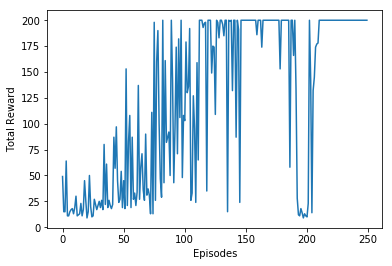

In [28]:
eps, rews = np.array(rewards_list).T
plt.plot(rews)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')

## Test model

In [29]:
for episode in range(5):
    
    counter = 0
    done = False
    state = env.reset()

    while not done:
        env.render()
        state = np.reshape(state, [1, 4])
        action = np.argmax(q_network.predict(state)[0])
        state, reward, done, _ = env.step(action)
        counter += 1

    print(episode + 1, counter)
                
env.render(close=True)

1 200
2 200
3 200
4 200
5 200
